In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

os.chdir('/Users/vladbuinceanu/Documents/KdG/Data and A.I./Sem 2/Python/Python/Sources')
import pandas as pd
from functions import *
def split_choices(row):
    return str.split(row, ',')

def split_preferences(row):
    return np.array([str.split(el,'=') for el in row])

def sort_preferences(row):
    try:
        ranknumbers = row[:,0].astype(int)
        return row[ranknumbers.argsort()][:,1]
    except Exception:
        return np.repeat(np.nan, 10)

In [3]:
studenq = pd.read_csv('Questionnaire 22-23.csv', delimiter=';', decimal = ',')

In [4]:
fruit_preferences = pd.DataFrame(zip(*studenq['Favorite Fruit'].apply(split_choices).apply(split_preferences).apply(sort_preferences)), index=range(1,11)).transpose()

display(fruit_preferences)

def transform_preference(df):
    order = df.loc[0].sort_values() # only if all fruits were used by this student –no doubles-

    index = pd.Series(order, dtype="category")
    copy_df = df.copy()
    for column in copy_df:
        copy_df[column] = copy_df[column].astype(pd.CategoricalDtype(categories=order))
        copy_df[column] = copy_df[column].cat.codes
    new_df= pd.DataFrame(index= index, columns=np.arange(copy_df.shape[0]))
    for i in range(copy_df.shape[0]):
        for j in range(copy_df.shape[1]):
            new_df.iat[copy_df.iat[i,j],i]=j+1
    for column in new_df:
        new_df[column] = pd.to_numeric(new_df[column])
    return new_df

fruit_pref_trans = transform_preference(fruit_preferences)
fruit_pref_trans = fruit_pref_trans.dropna(axis = 'columns')

display(fruit_pref_trans)

,1,2,3,4,5,6,7,8,9,10
0,Orange,Banana,Kiwi,Cherry,Plum,Strawberry,Melon,Pineapple,Apple,Pear
1,Strawberry,Orange,Banana,Apple,Cherry,Pineapple,Plum,Melon,Kiwi,Pear
2,Strawberry,Pineapple,Apple,Banana,Cherry,Kiwi,Melon,Pear,Plum,Orange
3,Orange,Kiwi,Cherry,Melon,Pineapple,Strawberry,Banana,Plum,Pear,Apple
4,Melon,Strawberry,Pineapple,Cherry,Banana,Kiwi,Plum,Pear,Orange,Apple
...,...,...,...,...,...,...,...,...,...,...
82,Apple,Pineapple,Melon,Orange,Pear,Cherry,Banana,Kiwi,Strawberry,Plum
83,Banana,Orange,Pear,Melon,Pineapple,Cherry,Kiwi,Plum,Apple,Strawberry
84,Orange,Pineapple,Cherry,Melon,Plum,Banana,Kiwi,Pear,Strawberry,Apple
85,Strawberry,Apple,Banana,Orange,Pineapple,Kiwi,Pear,Cherry,Plum,Melon


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
Apple,9,4,3,10,10,9,3,10,5,5,...,1,1,5,2,3,1,9,10,2,1
Banana,2,3,4,7,5,8,4,1,6,1,...,2,6,2,4,4,7,1,6,3,10
Cherry,4,5,5,3,4,6,5,3,3,7,...,6,7,6,5,5,6,6,3,8,4
Kiwi,3,9,6,2,6,10,6,4,1,8,...,9,10,3,10,6,8,7,7,6,5
Melon,7,8,7,4,1,5,7,8,9,10,...,3,9,4,1,7,3,4,4,10,3
Orange,1,2,10,1,9,4,10,7,7,2,...,4,4,10,7,10,4,2,1,4,7
Pear,10,10,8,9,8,3,8,6,10,4,...,7,5,9,3,8,5,3,8,7,6
Pineapple,8,6,2,5,3,7,2,5,4,6,...,5,2,1,8,2,2,5,2,5,9
Plum,5,7,9,8,7,2,9,9,8,9,...,8,3,7,9,9,10,8,5,9,2


# 1.b To what extent do Student003 and Student007 agree in terms of preference for fruit?

In [5]:
corel = fruit_pref_trans[3].corr(fruit_pref_trans[7], method = 'kendall')
display(corel)

0.15555555555555553

# 2 Is there a linear relationship between the number of siblings and the number of mobile devices a student uses ? What corelation are you going to use here ? What conclusion ?

Answer -> NO


In [6]:
display(studenq.Siblings.corr(studenq['Mobile Devices']))

0.11517871482185164

# 3. Is there a (linear) relationship between how important a student thinks his computer science studies are and how he sees the study load? What correlation are you going to use here?

In [7]:
studenq['Importance AI Study'] = studenq['Importance AI Study'].astype(pd.CategoricalDtype(categories=['Not at all', 'Little importance', 'Moderate importance' , 'Great importance', 'Very great importance','Extreemly important'], ordered=True))
studenq['Study Load'] = studenq['Study Load'].astype(pd.CategoricalDtype(categories=['<= 10 hours', '11-15 hours', '16-20 hours', '21-25 hours', '26-30 hours', '31-35 hours', '36-40 hours', '>= 41 hours'], ordered=True))

df = pd.DataFrame({'Importance': studenq['Importance AI Study'], 'Load': studenq['Study Load']})
df.dropna(axis='rows', inplace = True)
df.Importance = df.Importance.cat.codes
df.Load = df.Load.cat.codes
df.corr(method='kendall')
df.Importance.corr(df.Load, method='kendall')

0.1293422949203495

# 4. Keith Pledger's textbook "Edexcel GCSE Mathematics" claims that (for boys) the height in cm is equal to 5.3 times the shoe size plus 133. What formula do you get for the computer science students? Note: English shoe size  European shoe size


# a. Convert to uk shoe size

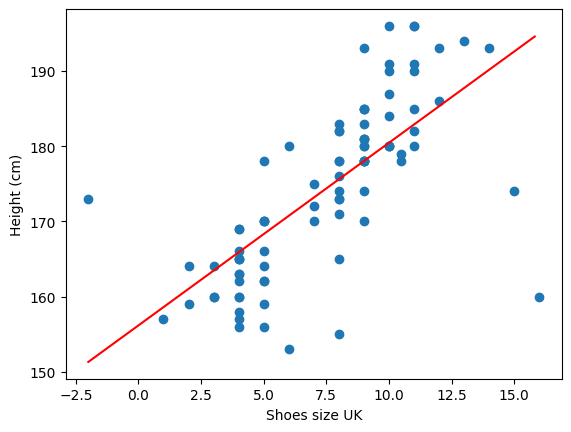

se  8.05


In [11]:
eu = [39,40,40.5,41,42,42.5,43,44,44.5,45,46,46.5,47,48]
uk = [5,6,6.5,7,8,8.5,9,10,10.5,11,12,12.5,13,14]
model = np.polyfit(eu, uk, 1)
predict = np.poly1d(model)
studenq['Shoe Size'] = studenq['Shoe Size'].astype(float)
shoe_size = studenq['Shoe Size'].values
shoe_uk = predict(shoe_size)

df = pd.DataFrame({'Shoe_Uk': shoe_uk, 'Height': studenq['Height']})
df.dropna(axis='rows', inplace=True)
x = df.Shoe_Uk
y = df.Height

model = np.polyfit(x,y,1)
predict = np.poly1d(model)
xx = np.arange(x.min(), x.max(), (x.max() - x.min())/100)
yy = predict(xx)
plt.figure()
plt.scatter(x,y)
plt.plot(xx,yy, color='red')
plt.xlabel('Shoes size UK')
plt.ylabel('Height (cm)')
plt.show()
print('se %5.2f'%math.sqrt(((predict(x) - y) ** 2).mean()))

